# Dynamic simulations (Insulin pulse/ clamp)

In [50]:
from model import *

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

# Set the font size
plt.rcParams.update({'font.size': 16, 'font.family': 'Arial'})
plt.rcParams.update({'lines.markeredgewidth': 1})


In [51]:
# Plot insulin data from Wons  experiments
df_lactate = pd.read_csv('./data/insulin_pulse_lactate.csv')
df_lac = df_lactate[df_lactate['Experiment'] == 'Insulin']
s = df_lac.groupby('Time')['Lactate'].std()
m = df_lac.groupby('Time')['Lactate'].mean()



In [52]:
m

Time
0.0     0.762996
2.0     1.456985
4.0     1.621918
8.0     0.863476
15.0    0.733339
30.0    0.661550
Name: Lactate, dtype: float64

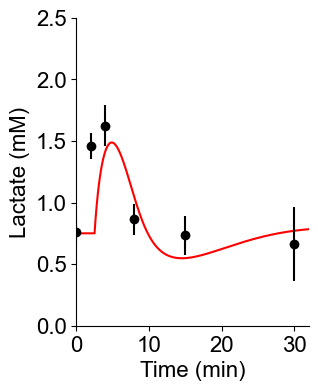

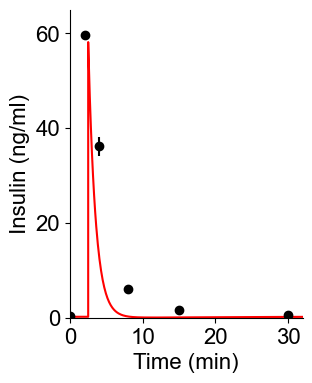

In [53]:

f, ax = plt.subplots(1,1, figsize=(3,4))

p = reference_parameters(concentration_noise=0, flux_noise=0, ki_noise=0)

# Amplitude emperical to match wons measurements 
t_pulse, result_pulse = insulin_pulse(p, t_max=150, n_data=2000, concentration_noise=0.0, pulse_time=2.5, pulse_amplitude=10.0)


# Plot the time os the pulse a grey area in the background
# Plot glucose and lactate
lac = plt.plot(t_pulse, result_pulse[:,1]*0.75, label="Lactate", color='r')

# Plot insulin data from Wons  experiments
df_lactate = pd.read_csv('./data/insulin_pulse_lactate.csv')
df_lac = df_lactate[df_lactate['Experiment'] == 'Insulin']
s = df_lac.groupby('Time')['Lactate'].std()
m = df_lac.groupby('Time')['Lactate'].mean()

plt.errorbar(m.index, m, yerr=s , color='k',marker='o', label='Data',linestyle='None')   

plt.ylim(0, 2.5)
plt.yticks([0, 0.5,1, 1.5, 2, 2.5])   
plt.xlim(0, 32)
plt.xticks([0, 10, 20, 30])
plt.xlabel('Time (min)')
plt.ylabel('Lactate (mM)')
sns.despine()

plt.savefig('./output/lactate_insulin_pulse.svg')
plt.show()

# Plot insulin pulse insulin 
f, ax = plt.subplots(1,1, figsize=(3,4))

# Plot insulin data from Wons  experiments
df_insulin = pd.read_csv('./data/insulin_pulse_insulin.csv')
s = df_insulin.groupby('Time').std()
m = df_insulin.groupby('Time').mean()

plt.errorbar(m.index, m['Insulin'], yerr=s['Insulin'] ,color='k',marker='o', label='Data',linestyle='None')   
# # Plot insulin concentration on the same plot
ins = plt.plot(t_pulse, result_pulse[:,3] * 0.2 / insulin(1,1,0), 'r', label="Insulin")

plt.ylim(0, 65.0)
plt.xlim(0, 32)
plt.xticks([0, 10, 20, 30])

plt.ylabel('Insulin (ng/ml)')
plt.xlabel('Time (min)')   
sns.despine()    
plt.savefig('./output/insulin_insulin_pulse.svg')
plt.show()



In [54]:
df_insulin.groupby('Time').mean()['Insulin']

Time
0      0.261748
2     59.719503
4     36.176924
8      6.005239
15     1.684796
30     0.593325
60     0.123047
Name: Insulin, dtype: float64

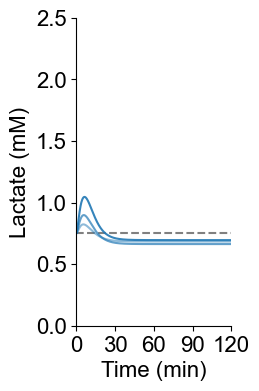

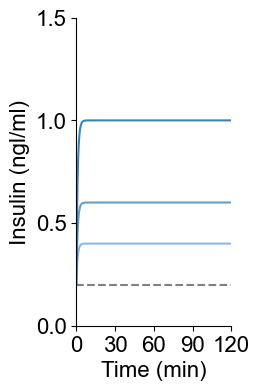

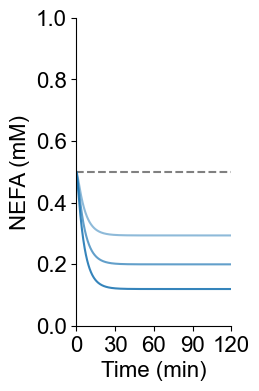

In [55]:
p = reference_parameters(concentration_noise=0, flux_noise=0, ki_noise=0)
t, res = response(p, t_max=120, n_data=1000, concentration_noise=0, type="clamped")

# Reference insulin 
I0 = insulin(1.0, 1.0, 0.0)
p_infusion_1 = change_parameters(p, e=[I0], ix=["deltaI"])
t, res_1 = response(p_infusion_1, t_max=120, n_data=1000, concentration_noise=0,  type="clamped")

p_infusion_2 = change_parameters(p, e=[2*I0], ix=["deltaI"])
t, res_2 = response(p_infusion_2, t_max=120, n_data=1000, concentration_noise=0,  type="clamped")

p_infusion_3 = change_parameters(p, e=[4*I0], ix=["deltaI"])
t, res_3 = response(p_infusion_3, t_max=120, n_data=1000, concentration_noise=0,  type="clamped")

# Plot the response of lacate 
f, ax = plt.subplots(1,1, figsize=(2,4))
plt.plot(t, res[:,1] * 0.75, label="Saline", color='grey', linestyle='--')
# Color that lines using a gradient of the same color
plt.plot(t, res_1[:,1] * 0.75, label="1x Basal insulin", color='C0', alpha=0.5)
plt.plot(t, res_2[:,1] * 0.75, label="2x Basal insulin", color='C0', alpha=0.7)
plt.plot(t, res_3[:,1] * 0.75, label="4x Basal insulin", color='C0', alpha=0.9)
plt.ylim(0, 2.5)
plt.yticks([0, 0.5, 1.0, 1.5, 2, 2.5])   
plt.xlim(0, 120)
plt.xticks([0, 30, 60, 90, 120])
plt.xlabel('Time (min)')
plt.ylabel('Lactate (mM)')

# REMOVE TOP and right SPINE
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Put the legend outside the plot
#plt.legend(loc='upper right',)

plt.savefig('./output/lactate_response_insulin_clamp.svg')

# PLot insulin concentrations
f, ax = plt.subplots(1,1, figsize=(2,4))

I0 = 0.2/insulin(1.0, 1.0, 0.0)
plt.plot(t, res[:,3] * I0, label="Saline", color='grey', linestyle='--')
# Color that lines using a gradient of the same color
plt.plot(t, res_1[:,3] * I0, label="1x Basal insulin", color='C0', alpha=0.5)
plt.plot(t, res_2[:,3] * I0, label="2x Basal insulin", color='C0', alpha=0.7)
plt.plot(t, res_3[:,3] * I0, label="4x Basal insulin", color='C0', alpha=0.9)
plt.ylim(0, 1.5)
plt.xlim(0, 120)
plt.xticks([0, 30, 60, 90, 120])
plt.xlabel('Time (min)')
plt.ylabel('Insulin (ngl/ml)')
plt.yticks([0, 0.5, 1.0, 1.5, ])

# REMOVE TOP and right SPINE
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('./output/insulin_response_insulin_clamp.svg')
#plt.legend()
plt.show()

# Plot NEFA response
f, ax = plt.subplots(1,1, figsize=(2,4))

plt.plot(t, res[:,2]*0.5, label="Saline", color='grey', linestyle='--')
# Color that lines using a gradient of the same color
plt.plot(t, res_1[:,2] * 0.5, label="1x Basal insulin", color='C0', alpha=0.5)
plt.plot(t, res_2[:,2] * 0.5, label="2x Basal insulin", color='C0', alpha=0.7)
plt.plot(t, res_3[:,2] * 0.5, label="4x Basal insulin", color='C0', alpha=0.9)
plt.ylim(0, 1.0)
plt.xlim(0, 120)
plt.xticks([0, 30, 60, 90, 120])
plt.xlabel('Time (min)')
plt.ylabel('NEFA (mM)')

# REMOVE TOP and right SPINE
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('./output/nefa_response_insulin_clamp.svg')
plt.show()